# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [117]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [118]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

C:\Users\kflin\AppData\Local\Temp\ipykernel_12072\43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [119]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [120]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [121]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [122]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [123]:
#create your Datetime column

# incoming data format
format_str = '%d/%m/%Y %H:%M:%S'

# concatenate Date and Time into one column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format=format_str)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [124]:
#convert all data columns to numeric types
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
# apply numeric conversion to each column, coerce is used to covert question marks to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [125]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [126]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [127]:
df.Date[0]

datetime.date(2006, 12, 16)

In [128]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [129]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

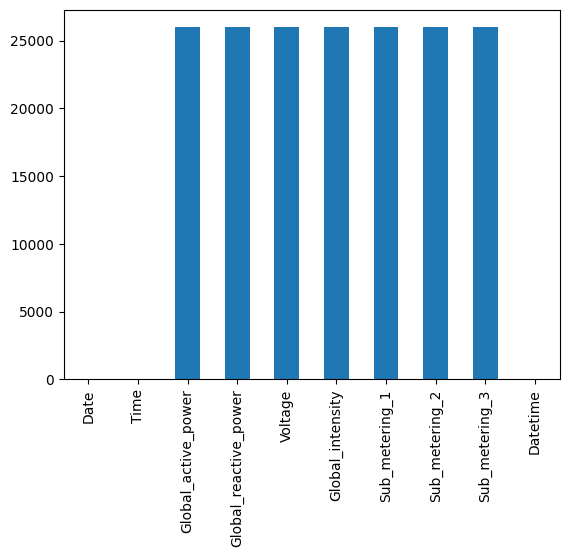

In [130]:
df.isna().sum().plot.bar()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64


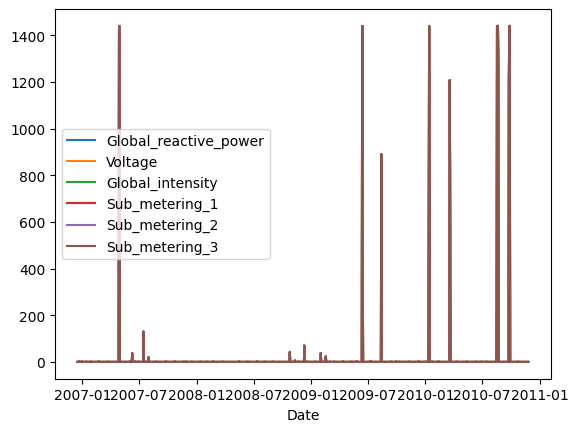

In [131]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

missing_values_count = df.isna().sum()
print(missing_values_count)


**Q: What do you notice about the pattern of missing data?**

A: It seems like there were particular times where sensor data was not available. It looks like all of the sensor data went down at those same times. It's possible there was some kind of outage or network issue.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: What to do depends on if we can determine why the data is missing. If this was due to a power outage, it might be appropriate to replace all of these values with 0 since the house would not be consuming power at these times. However, I don't believe I can determine this from the data given so it seems like the safest option is to remove these points from the dataset. Since we have millions of records and only 25,979 missing values, I believe we will still be able to get insights out of the dataset if we exclude these.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [132]:
#clean up missing data here

df.dropna(inplace=True)


In [133]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: The global active power includes all sub-metering so I've decided to drop the sub-metering to focus on the power consumption of the house as a whole. It is acceptable to do this because changes in sub-metering are still captured in the global active power. If we were interested in comparing different sub sections of house's electric consumption over time then we'd want to include the sub-metering along with any power usage not tracked by the sub-metering (i.e. global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3 as mentioned in the dataset information).

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

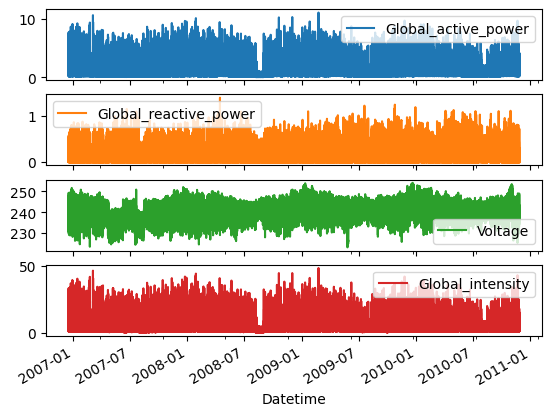

In [134]:
df.plot('Datetime', ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], subplots=True)

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: It's hard to draw any conclusions from visualizing the raw data. There's a lot of data points taken over years and their density makes it hard to see subtle changes over the course of a day, week or month. It might be more useful to compare points taken over the course of a day or week to help see trends in usage. The visualization of all the data can only give us an idea of trends over multiple years which is not necessarily where we'd find interesting patterns.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [135]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

columns = ['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
monthly_average = df[columns].groupby(pd.Grouper(key='Datetime', freq='M')).mean()

monthly_average

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2006-12-31,1.901295,0.131386,241.441125,8.029956
2007-01-31,1.546034,0.132676,240.905101,6.546915
2007-02-28,1.401084,0.113637,240.519390,5.914569
2007-03-31,1.318627,0.114747,240.513469,5.572979
2007-04-30,0.891189,0.118778,239.400026,3.825676
2007-05-31,0.985862,0.115343,235.178364,4.297464
2007-06-30,0.826814,0.146395,238.875530,3.603550
2007-07-31,0.667367,0.127481,237.671247,2.944133
2007-08-31,0.764186,0.112816,237.937241,3.312668


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

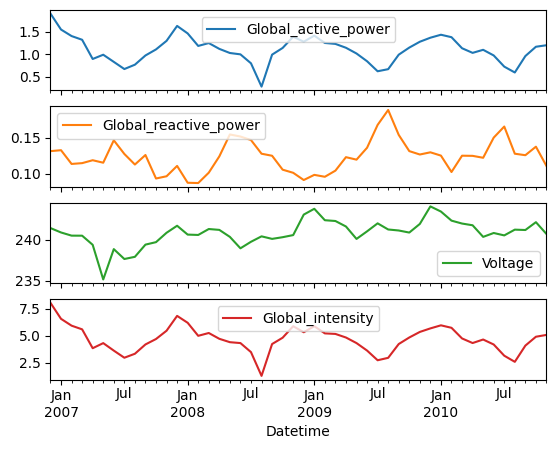

In [136]:
#build your linechart here

monthly_average.plot(y=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], subplots=True)

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: From the monthly averages it is far more clear that there is a very close positive correlation between global intensity and global active power. There may also be a positive correlation between the global intensity and voltage but that is less clear. There seems to be a negative correlation between global active power and global reactive power.

We can also see a pattern of winter months requiring more energy than the summer. July consistently sees the sharpest dip in energy usage.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [137]:
# compute your moving average here

# set the index to be the datetime column
df.set_index('Datetime', inplace=True)

# calculate widow size for 30 days
window_size = 30 * 1440  # 30 days * 1440 minutes/day
# calculate rolling average excluding the first 30 days of entries
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
rolling_average_30_days = df[columns].rolling(window_size, min_periods=window_size).mean()
rolling_average_30_days

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2006-12-16 17:24:00,NaN,NaN,NaN,NaN
2006-12-16 17:25:00,NaN,NaN,NaN,NaN
2006-12-16 17:26:00,NaN,NaN,NaN,NaN
2006-12-16 17:27:00,NaN,NaN,NaN,NaN
2006-12-16 17:28:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2010-11-26 20:58:00,1.180812,0.114159,241.344728,4.979477
2010-11-26 20:59:00,1.180822,0.114152,241.344692,4.979514
2010-11-26 21:00:00,1.180832,0.114145,241.344667,4.979546


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

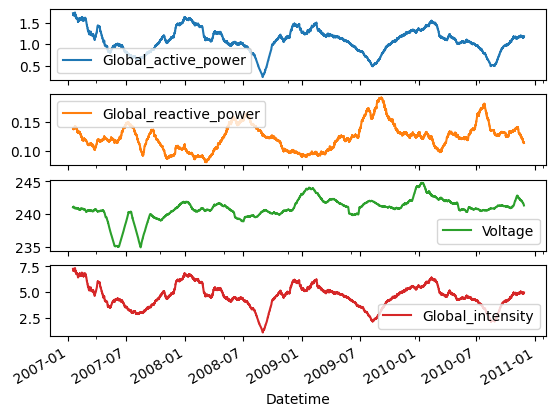

In [138]:
#build your line chart on the moving average here

rolling_average_30_days.plot(y=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], subplots=True)

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average is less smooth than the monthly average. It represents a lot more data points and captures smaller variances. At this high level view I feel that the monthly averages might be more effective. I think it gives us enough to see broad trends without introducing as much noise.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

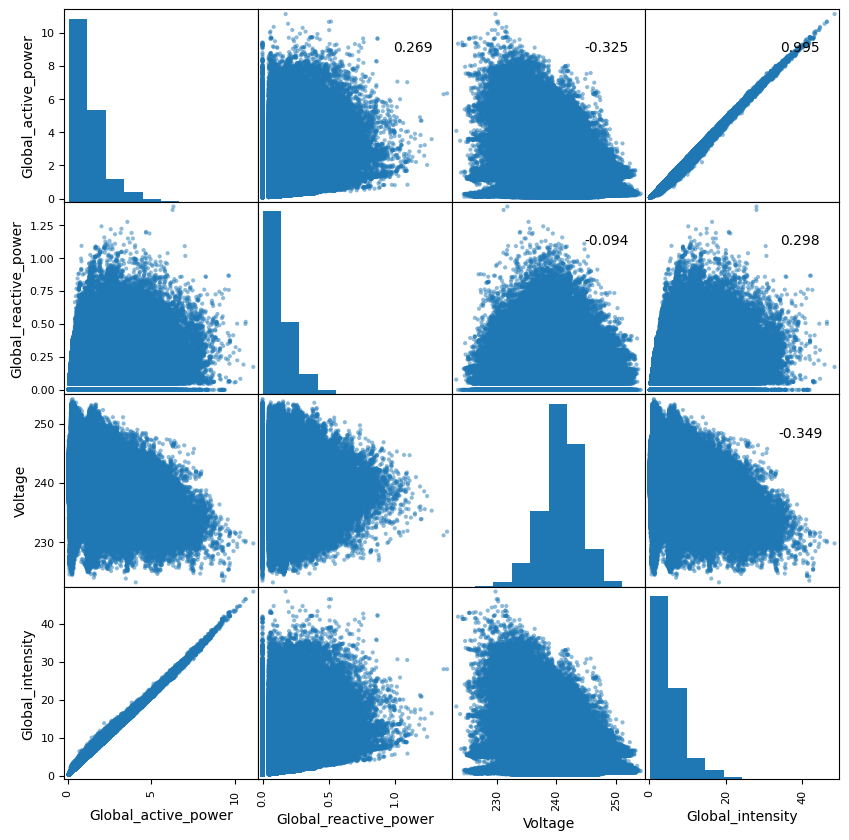

In [139]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: There is a weak negative correlation between voltage and global active power and a weak positive correlation between voltage and global intensity. The strongest correlation is between global active power and global intensity. It seems there is a direct positive relationship between these two metrics. In downstream tasks such as training a machine learning model, we might want to exclude highly correlated variables as they can be redundant and skew results.

